In [1]:
import sys, os
sys.path.append(os.path.abspath("../../"))

In [2]:
from core_elts import lib as core
from snii_elements import lib as snii
from snii_no_elements import lib as snii_no_elts

In [3]:
core.detailed_enrichment_init()
snii.detailed_enrichment_init()
snii_no_elts.detailed_enrichment_init()

In [14]:
from collections import defaultdict
import numpy as np
from tabulation import Lifetimes
from tabulation import IMF
from scipy import integrate
from tqdm import tqdm_notebook as tqdm

import betterplotlib as bpl
bpl.presentation_style()

In [5]:
sn_ii_idxs = {"C": 0, "N": 1, "O":2, "Mg":3, "S":4, "Ca": 5, "Fe": 6,
              "Z_II": 7, "Z": 7, "total": 8, "E": 9, "N_SN": 10, "N_SN_left": 11}

# Check rates

this will not take leftover SN into account, so will be done with a large mass so that won't matter

In [18]:
dt = 1E4
times = np.arange(1E6, 50E6, dt)

In [19]:
lt = Lifetimes("Raiteri_96")

In [20]:
m_test = 1E8

In [21]:
snii.get_ejecta_sn_ii_py(0, 120, 45, m_test, 0.02)[10]

16387.0

In [22]:
zs = [0.004, 0.0075, 0.01, 0.015, 0.02]

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


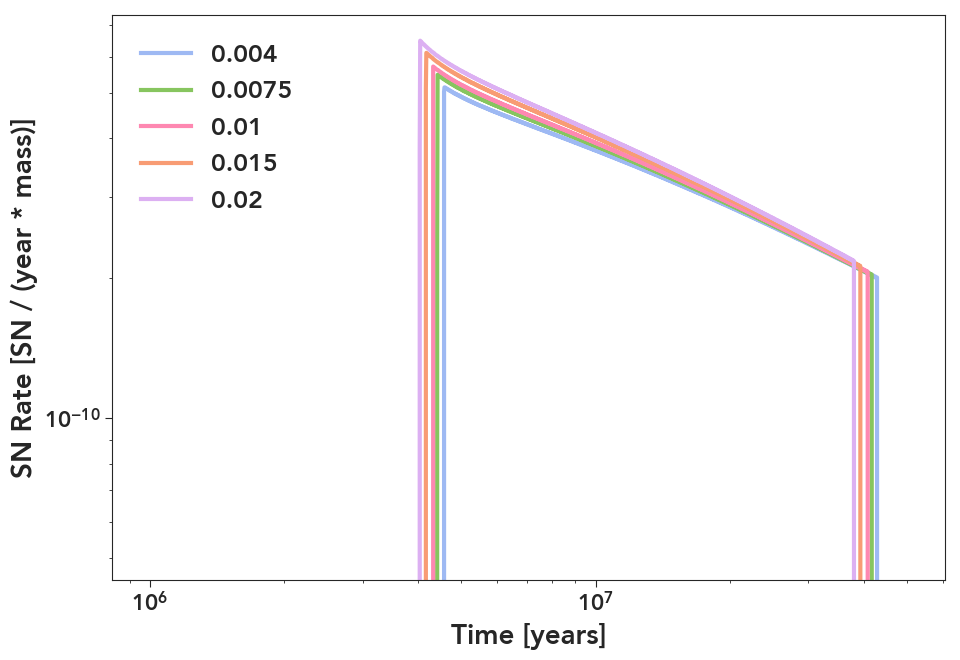

In [23]:
fig, ax = bpl.subplots()
for z in zs:
    turnoff_masses = [lt.turnoff_mass(t, z) for t in tqdm(times)]
    
    sn_rate = []
    for idx in range(len(turnoff_masses) - 1):
        m_now = turnoff_masses[idx]
        m_next = turnoff_masses[idx + 1]
        sn_rate.append(snii.get_ejecta_sn_ii_py(0, m_now, m_next, m_test, z)[sn_ii_idxs["N_SN"]] / (dt * m_test))
    ax.plot(times[:-1], sn_rate, label=z)
ax.set_xscale("log")
ax.set_yscale("log")
ax.add_labels("Time [years]", "SN Rate [SN / (year * mass)]")
ax.legend()